#### ***Loading data sets***


In [1]:
import torch

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#### ***Building the neural network model***


In [4]:
from torch import nn



>**#Making our model**



In [5]:

model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)



> **#Declaring our loss function**




In [6]:
criterion = nn.NLLLoss()

In [27]:
features , labels = next(iter(trainloader))

images = features.view(features.shape[0],-1)

prediction = model(images)

loss = criterion(prediction , labels)

x = torch.FloatTensor([1,2,3,4])


tensor(1.)



> **#Declaring our Optimizer**



In [ ]:
from torch import optim

#here i am using stochastic gradient descent 
optimizer = optim.SGD( model.parameters() , lr = 0.003) #lr is learning rate            




> **#Training the network**




In [ ]:
# set the number of epoches
epochs = 5
for e in range(5):
    current_loss = 0 
    for features,labels in trainloader:
        
        # Since we have images as features we need to flatten them
        images = features.view(features.shape[0],-1) #flatten the images

        # Clearing previous gradients
        optimizer.zero_grad()

        # Feed-Forward
        predictions = model(images)

        # Calculate the loss/cost
        loss = criterion(predictions , labels)

        # Back-Propogation
        loss.backward()

        # Update the weights
        optimizer.step()

        current_loss += loss.item()
    
    print(f'Training Loss:{current_loss/len(trainloader)}')


Training Loss:1.8704887768352971
Training Loss:0.7990732109432281
Training Loss:0.4996500425120152
Training Loss:0.4152934372043813
Training Loss:0.37457406773432483


#### ***Checking model results***

In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

tensor([[-10.3474, -10.2615,  -8.8668,  -4.9790,  -3.0199,  -4.9443,  -9.1249,
          -4.8317,  -5.5264,  -0.0780]])


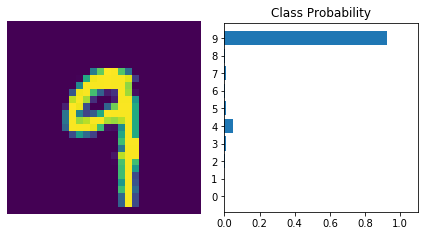

In [ ]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

helper.view_classify(img.view(1, 28, 28), ps)